In [ ]:
# 참고코드
# https://dacon.io/competitions/official/236010/codeshare/6981?page=1&dtype=recent

## 1. Data Load

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* data load

In [ ]:
total_df = pd.read_csv('C:/Users/euna95/Desktop/2022_2학기/TNT/POSTECH/total_df.csv')

In [ ]:
total_df.head(5)

,Unnamed: 0,id,date,hour,group,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,pressure,precip_1h,amount
0,0,2,2020-10-01,1,1 / 2020-10-01 / 01,16.8,87.0,14.6,338.0,4.5,0.0,16.1,30.0,9144.0,1011.0,0.0,0.0
1,1,2,2020-10-01,2,1 / 2020-10-01 / 02,16.4,95.0,15.6,45.0,4.5,0.0,12.9,8.0,9144.0,1012.0,0.0,0.0
2,2,2,2020-10-01,3,1 / 2020-10-01 / 03,16.3,91.0,14.8,23.0,3.5,0.0,12.9,16.0,9144.0,1012.0,0.0,0.0
3,3,2,2020-10-01,4,1 / 2020-10-01 / 04,15.7,89.0,13.9,158.0,4.5,0.0,16.1,76.0,9144.0,1012.0,0.0,0.0
4,4,2,2020-10-01,5,1 / 2020-10-01 / 05,16.2,90.0,14.6,68.0,5.3,0.0,12.9,47.0,9144.0,1012.0,0.0,0.0


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384208 entries, 0 to 384207
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   384208 non-null  int64  
 1   id           384208 non-null  int64  
 2   date         384208 non-null  object 
 3   hour         384208 non-null  int64  
 4   group        384208 non-null  object 
 5   temperature  384208 non-null  float64
 6   humidity     384208 non-null  float64
 7   dew_point    384208 non-null  float64
 8   wind_dir     384208 non-null  float64
 9   wind_spd     384208 non-null  float64
 10  uv_idx       384208 non-null  float64
 11  visibility   384208 non-null  float64
 12  cloudiness   384208 non-null  float64
 13  ceiling      384208 non-null  float64
 14  pressure     384108 non-null  float64
 15  precip_1h    384108 non-null  float64
 16  amount       384170 non-null  float64
dtypes: float64(12), int64(3), object(2)
memory usage: 49.8+ MB


* drop NA samples

In [ ]:
total_df_no_na = total_df.dropna(axis=0)

In [ ]:
total_df_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384070 entries, 0 to 384207
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   384070 non-null  int64  
 1   id           384070 non-null  int64  
 2   date         384070 non-null  object 
 3   hour         384070 non-null  int64  
 4   group        384070 non-null  object 
 5   temperature  384070 non-null  float64
 6   humidity     384070 non-null  float64
 7   dew_point    384070 non-null  float64
 8   wind_dir     384070 non-null  float64
 9   wind_spd     384070 non-null  float64
 10  uv_idx       384070 non-null  float64
 11  visibility   384070 non-null  float64
 12  cloudiness   384070 non-null  float64
 13  ceiling      384070 non-null  float64
 14  pressure     384070 non-null  float64
 15  precip_1h    384070 non-null  float64
 16  amount       384070 non-null  float64
dtypes: float64(12), int64(3), object(2)
memory usage: 52.7+ MB


* 필요없는 feature drop

In [ ]:
total_df_no_na = total_df_no_na.drop(['id'],axis=1)
total_df_no_na = total_df_no_na.drop(['Unnamed: 0'],axis=1)
total_df_no_na = total_df_no_na.drop(['date'],axis=1)
# total_df_no_na = total_df_no_na.drop(['hour'],axis=1)
total_df_no_na = total_df_no_na.drop(['group'],axis=1)

In [ ]:
Counter(list(total_df_no_na['hour']))

#계절 날짜에 관한 정보는 humiditiy 등 나머지 weather 정보에 들어가 있으리라 보고 시간만 고려한다.

Counter({1: 15694,
         2: 15939,
         3: 15492,
         4: 15673,
         5: 16002,
         6: 17043,
         7: 16636,
         8: 15819,
         9: 15809,
         10: 15396,
         11: 15821,
         12: 15384,
         13: 16060,
         14: 15831,
         15: 15682,
         16: 16756,
         17: 16104,
         18: 16127,
         19: 16727,
         20: 16006,
         21: 15680,
         22: 15971,
         23: 16385,
         0: 16033})

In [ ]:
total_df_no_na.head(4)

,hour,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,pressure,precip_1h,amount
0,1,16.8,87.0,14.6,338.0,4.5,0.0,16.1,30.0,9144.0,1011.0,0.0,0.0
1,2,16.4,95.0,15.6,45.0,4.5,0.0,12.9,8.0,9144.0,1012.0,0.0,0.0
2,3,16.3,91.0,14.8,23.0,3.5,0.0,12.9,16.0,9144.0,1012.0,0.0,0.0
3,4,15.7,89.0,13.9,158.0,4.5,0.0,16.1,76.0,9144.0,1012.0,0.0,0.0


In [ ]:
#한시간 동안의 평균 온도, 습도... 이므로 강수량을 한 칸씩 올리면 현재 한시간 동안의 precip_1h 강수량이 되지 않을까?

In [ ]:
#precip_1h를 한칸씩 끌어올리자

total_df_no_na['precip_1h_now'] = total_df_no_na['precip_1h'].shift(-1)

In [ ]:
total_df_no_na

,hour,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,pressure,precip_1h,amount,precip_1h_now
0,1,16.8,87.0,14.6,338.0,4.5,0.0,16.1,30.0,9144.0,1011.0,0.0,0.000,0.0
1,2,16.4,95.0,15.6,45.0,4.5,0.0,12.9,8.0,9144.0,1012.0,0.0,0.000,0.0
2,3,16.3,91.0,14.8,23.0,3.5,0.0,12.9,16.0,9144.0,1012.0,0.0,0.000,0.0
3,4,15.7,89.0,13.9,158.0,4.5,0.0,16.1,76.0,9144.0,1012.0,0.0,0.000,0.0
4,5,16.2,90.0,14.6,68.0,5.3,0.0,12.9,47.0,9144.0,1012.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384203,20,12.9,67.0,6.9,293.0,9.4,0.0,48.3,0.0,12192.0,1020.4,0.0,0.008,0.0
384204,21,12.7,44.0,0.7,315.0,9.3,0.0,24.1,0.0,12192.0,1019.6,0.0,0.008,0.0
384205,22,12.9,43.0,0.7,315.0,9.3,0.0,49.9,0.0,12192.0,1019.9,0.0,0.008,0.0
384206,22,12.6,59.0,4.9,338.0,10.5,0.0,49.9,1.0,12192.0,1019.9,0.0,0.008,0.0


In [ ]:
total_df_no_na.dropna(axis=0)

,hour,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,pressure,precip_1h,amount,precip_1h_now
0,1,16.8,87.0,14.6,338.0,4.5,0.0,16.1,30.0,9144.0,1011.0,0.0,0.000,0.0
1,2,16.4,95.0,15.6,45.0,4.5,0.0,12.9,8.0,9144.0,1012.0,0.0,0.000,0.0
2,3,16.3,91.0,14.8,23.0,3.5,0.0,12.9,16.0,9144.0,1012.0,0.0,0.000,0.0
3,4,15.7,89.0,13.9,158.0,4.5,0.0,16.1,76.0,9144.0,1012.0,0.0,0.000,0.0
4,5,16.2,90.0,14.6,68.0,5.3,0.0,12.9,47.0,9144.0,1012.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384202,19,13.3,69.0,7.8,315.0,9.7,0.0,45.1,2.0,12192.0,1020.6,0.0,0.004,0.0
384203,20,12.9,67.0,6.9,293.0,9.4,0.0,48.3,0.0,12192.0,1020.4,0.0,0.008,0.0
384204,21,12.7,44.0,0.7,315.0,9.3,0.0,24.1,0.0,12192.0,1019.6,0.0,0.008,0.0
384205,22,12.9,43.0,0.7,315.0,9.3,0.0,49.9,0.0,12192.0,1019.9,0.0,0.008,0.0


# 2. Data preprocessing

## 1) train_Test_split

In [ ]:
sun_df = total_df_no_na.drop(['amount'], axis = 1)
target = total_df_no_na['amount']
X_train, X_test, y_train, y_test = train_test_split(sun_df, target, test_size = 0.2, random_state = 41)

## 2) Scaling

In [ ]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

scalerY = StandardScaler()
scalerY.fit(y_train.reshape(-1,1))
y_train_scaled = scalerY.transform(y_train.reshape(-1,1))
y_test_scaled = scalerY.transform(y_test.reshape(-1,1))

# 태양광 발전에 영향을 주는 요소

In [ ]:
# 태양광 전지판 온도도 중요함 - 태양광 전지판 온도가 상승할수록 발전 효율은 감소

In [ ]:
# temperature : 기온 -- 태양광 모듈 온도에 영향을 끼칠 뿐 직접적으로 태양광 발전량에 영향을 주지는 않는다.
# humidity : 습도(%) -- 운량
# dew_point : 이슬점 -- 운량
# wind_dir : 풍향 -- 태양광 발전과 관계 없다.
# wind_spd : 풍속 -- 태양광 발전과 영향이 있지만 다른 요소에 비해 약함
# uv_idx : 자외선 강도 -- 일사량
# visibility : 가시거리 -- 습도가 영향을 주므로 운량 요소에 포함
# cloudiness : 운량 -- 운량
# ceiling : 최저운고 -- 운량과의 관계 확인 필요
# pressure : 기압 -- 운량, 일사량과의 관계 확인 필요
# precip_1h : 지난 1시간동안의 관측된 강수량 -- 운량과 일사량과의 관계 확인 필요
# amount : 발전량

## 1) 일사량
* 단위 면적이 단위시간에 받는 일사 에너지의 양으로 지표면에 도달한 태양에너지의 양
* 공기 분자, 먼지, 수증기, 오염물질, 구름, 습도 등에 의해서 감소
* 태양의 고도에 따라 변화 즉, 날짜/시간에 따라 변화

In [ ]:
# uv_idx 에 따른 발전량의 관계

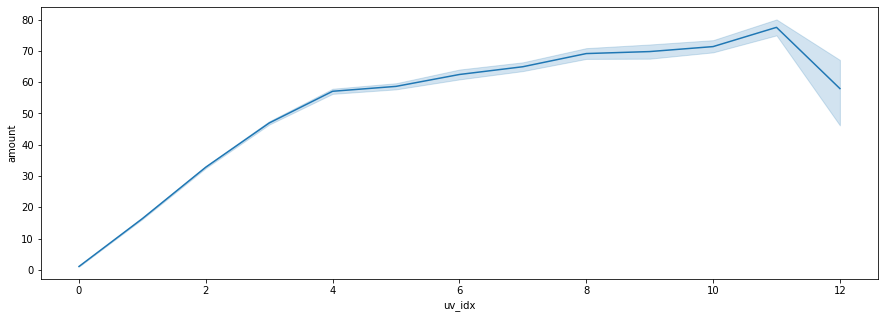

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['uv_idx'], y=total_df_no_na['amount'])
plt.show()

# 일사량이 커짐에 따라 발전량의 올라가다가 특정 시점부터는 발전량이 다시 줄어듦.

In [ ]:
# 풍속 wind_spd과 일사량의 관계

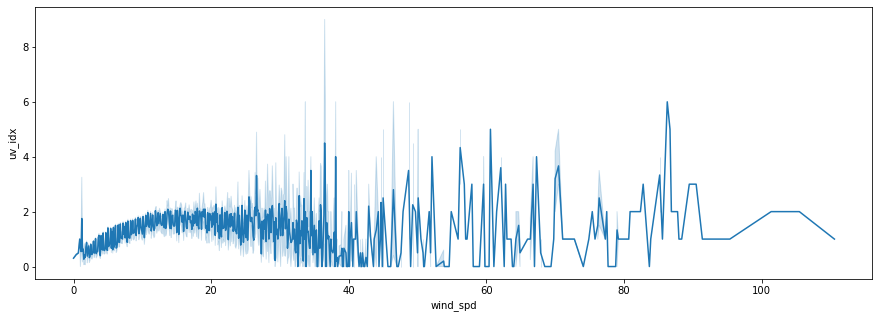

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['wind_spd'], y=total_df_no_na['uv_idx'])
plt.show()

# 관계 없어 보임.

In [ ]:
# 가시거리 visibility와 일사량의 관계

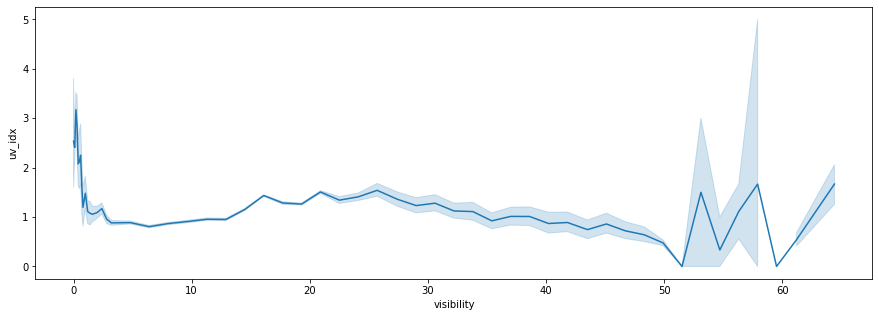

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['visibility'], y=total_df_no_na['uv_idx'])
plt.show()

# 관계 없어보임

In [ ]:
# 기압 pressure와 일사량의 관계

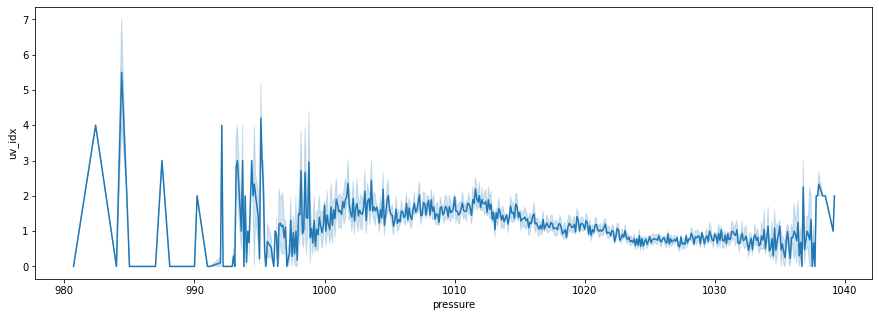

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['pressure'], y=total_df_no_na['uv_idx'])
plt.show()

# 관계 없어보임.

In [ ]:
# 강수량 precip_1h_now와 일사량의 관계

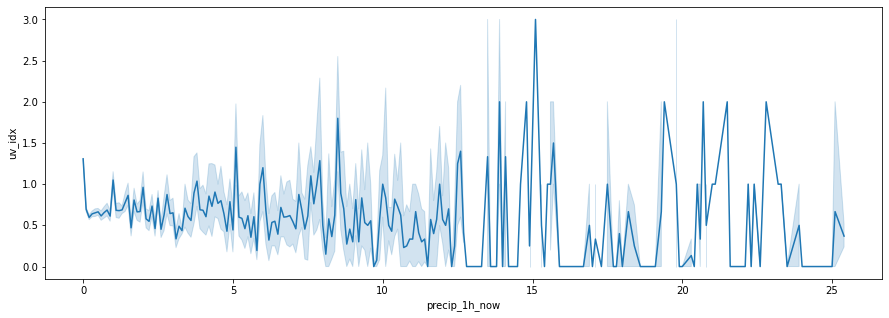

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['precip_1h_now'], y=total_df_no_na['uv_idx'])
plt.show()

# 관계 없어보임

In [ ]:
# 온도와 일사량의 관계

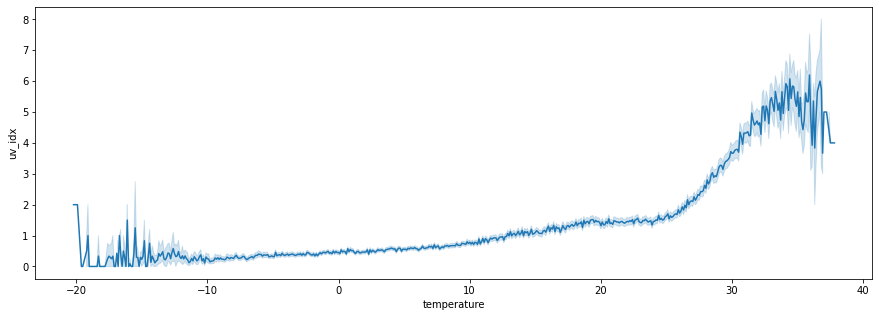

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['temperature'], y=total_df_no_na['uv_idx'])
plt.show()

## 2) 운량
* 하늘 전체를 10으로 하였을 때 눈에 보이는 구름의 ㅁ녀적이 전체의 몇 할 정도인가를 0~10 사이의 수치로 표현한 것
* 2이하 : 쾌청
* 3~7 : 맑음
* 8이상 : 흐림

In [ ]:
# 운량 cliudiness와 발전량의 관계

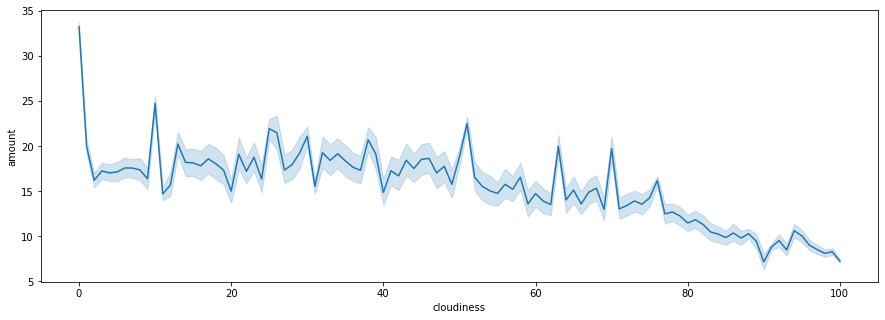

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['cloudiness'], y=total_df_no_na['amount'])
plt.show()

# 운량이 많아질수록 발전량은 떨어진다.

In [ ]:
# 기온 temperature와 운량의 관계

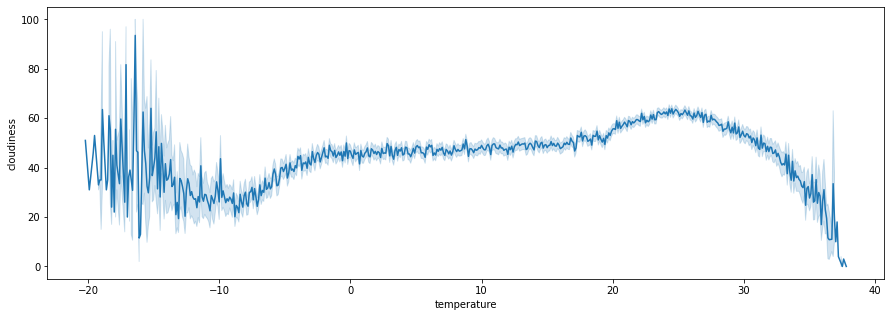

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['temperature'], y=total_df_no_na['cloudiness'])
plt.show()

# 관계는 있는 것 같음

In [ ]:
# 습도 humidity와 운량의 관계

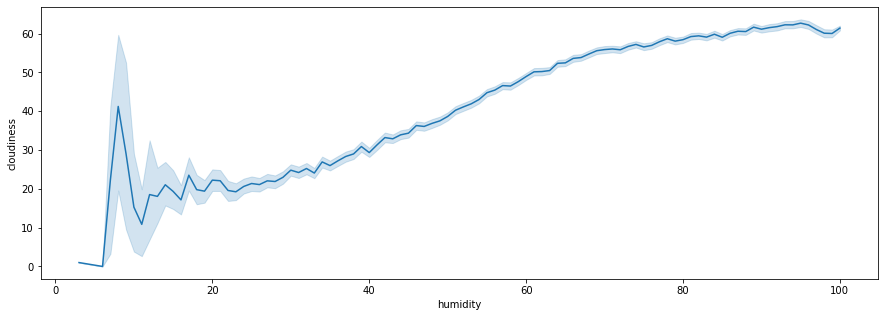

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['humidity'], y=total_df_no_na['cloudiness'])
plt.show()

# 습도가 올라갈수록 운량이 증가함.

In [ ]:
# 이슬점 dew_point와 운량의 관계

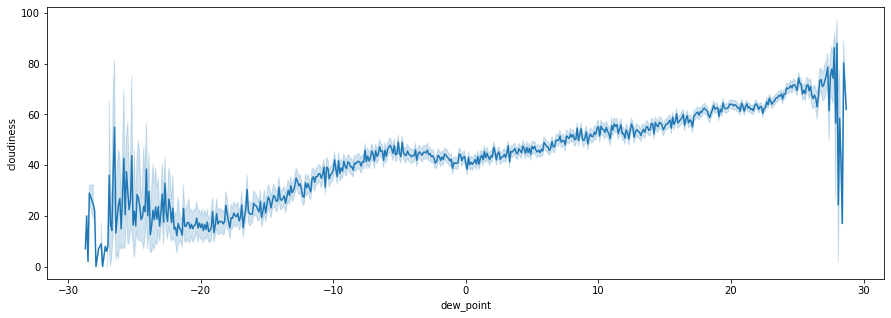

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['dew_point'], y=total_df_no_na['cloudiness'])
plt.show()

In [ ]:
# 풍속 wind_spd와 운량의 관계

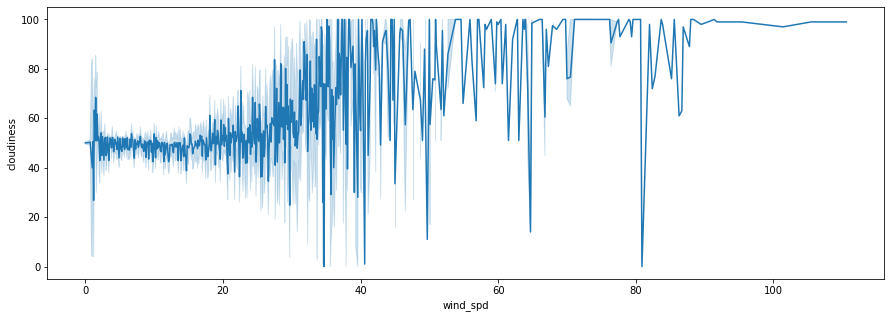

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['wind_spd'], y=total_df_no_na['cloudiness'])
plt.show()

# 큰관련은 없어보임.

In [ ]:
# 가시거리 visibility와 운량의 관계

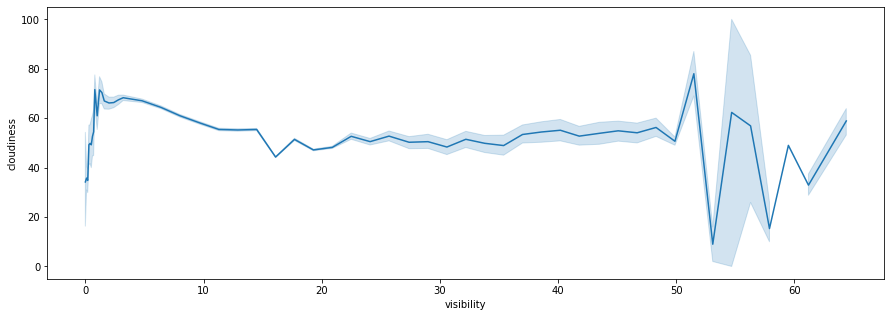

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['visibility'], y=total_df_no_na['cloudiness'])
plt.show()

# 큰관련은 없어보임

In [ ]:
# 최저운고 ceiling과 운량의 관계

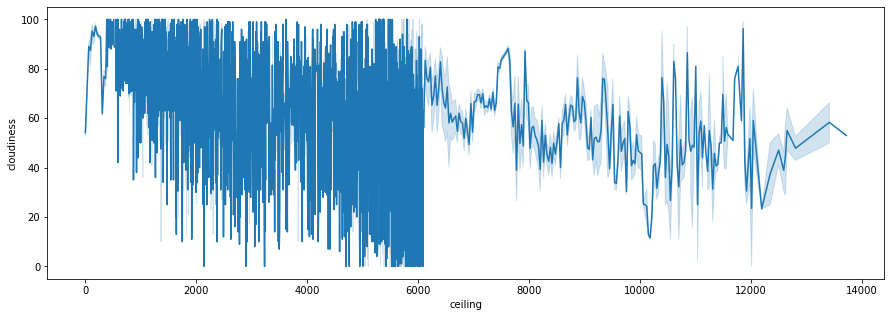

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['ceiling'], y=total_df_no_na['cloudiness'])
plt.show()

# 생각보다 관계 없어보임...

In [ ]:
# 강수량 precip_1h_now와 운량의 관계

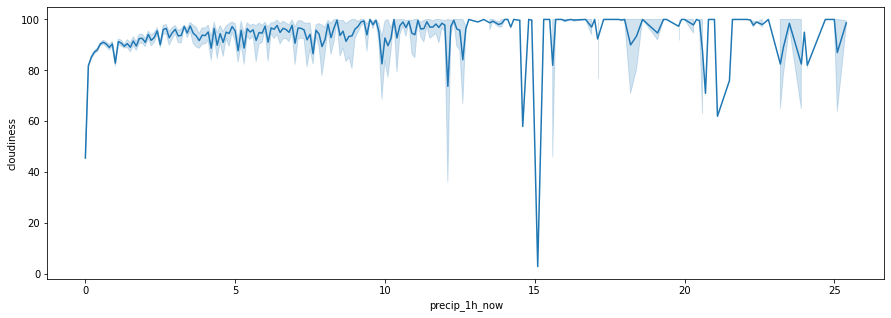

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na['precip_1h_now'], y=total_df_no_na['cloudiness'])
plt.show()

# 강수량이 0이냐 0이 아니냐가 의미가 있어 보인다.

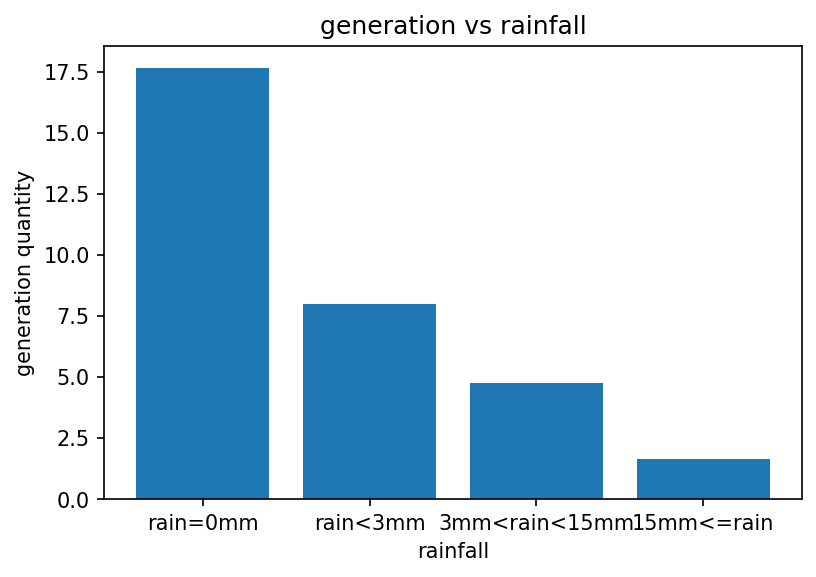

In [ ]:
# 강수량이 0인날과 0이 아닌 날의 발전량 평균 비교

# 맑음 = 0mm
# 약한 비는 1시간에 3mm 미만, 
# (보통) 비는 1시간에 3~15mm 미만, 
# 강한 비는 1시간에 15mm 이상,
x=['rain=0mm','rain<3mm','3mm<rain<15mm','15mm<=rain']
y_rain_0=total_df_no_na[total_df_no_na['precip_1h_now']==0]
y_rain_1=total_df_no_na[(total_df_no_na['precip_1h_now']>0) &(total_df_no_na['precip_1h_now']<=3)]
y_rain_2=total_df_no_na[(total_df_no_na['precip_1h_now']>=3) &(total_df_no_na['precip_1h_now']<15)]
y_rain_3=total_df_no_na[total_df_no_na['precip_1h_now']>=15]
y=[y_rain_0['amount'].mean(),y_rain_1['amount'].mean(),y_rain_2['amount'].mean(),y_rain_3['amount'].mean()]
#print(x)
#print(y)

plt.figure(dpi=150)
# 태양광 발전량 = geneartion quantity 
# 강수량 = rainfall
plt.title("generation vs rainfall")
plt.xlabel('rainfall')
plt.ylabel('generation quantity')
plt.bar(x, y)
plt.show()

# 강수량 많을수록 발전량 줄어듦
# 강수량 0일 때 확연하다.

# 가설
###### 1) 발전량에는 일사량 관련 칼럼이 많은 영향을 미칠 것이다.
###### 2) 상대습도가 높을수록 발전량이 낮을 것이다.
###### 3) 기온이 높으면 발전량이 높을 것이다.
###### 4) 풍속은 발전량보다 상대습도와 연관이 있을 것이다.

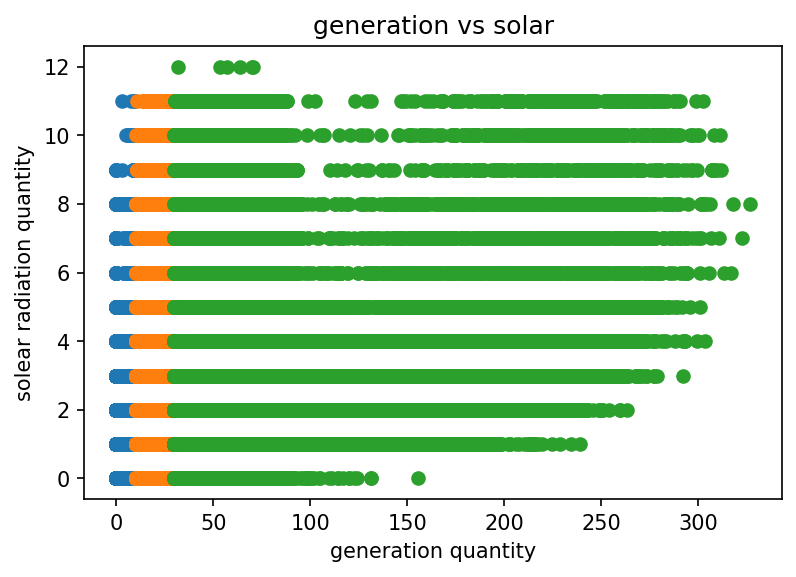

In [ ]:
# 가설 1)

# 태양광 발전량이 10미만인 날
x_0 = total_df_no_na.loc[total_df_no_na['amount']<10, 'amount']
y_0 = total_df_no_na.loc[total_df_no_na['amount']<10, 'uv_idx']

# 태양광 발전량이 10이상 30미만인 날
x_1 = total_df_no_na.loc[(total_df_no_na['amount']>=10)&(total_df_no_na['amount']<30), 'amount']
y_1 = total_df_no_na.loc[(total_df_no_na['amount']>=10)&(total_df_no_na['amount']<30), 'uv_idx']

# 태양광 발전량이 30이상인 날
x_2 = total_df_no_na.loc[total_df_no_na['amount']>=30, 'amount']
y_2 = total_df_no_na.loc[total_df_no_na['amount']>=30, 'uv_idx']


# scatter 산점도 그래프 그리기
plt.figure(dpi=150) 

# 발전량 = generation quantity
# 일사량 = solar radiation quantity
plt.title('generation vs solar')
plt.xlabel('generation quantity')
plt.ylabel('solear radiation quantity')


plt.scatter(x_0, y_0) # 파랑
plt.scatter(x_1, y_1) # 주황
plt.scatter(x_2, y_2) # 초록

plt.show()

## 필요없는 column 삭제

In [ ]:
total_df_no_na_tmp = total_df_no_na

In [ ]:
total_df_no_na_tmp.drop(columns=['wind_dir','wind_spd','visibility','ceiling','pressure','precip_1h'],inplace=True)

In [ ]:
total_df_no_na_tmp.dropna(axis=0,inplace=True)

In [ ]:
total_df_no_na_tmp

,hour,temperature,humidity,dew_point,uv_idx,cloudiness,amount,precip_1h_now
0,1,16.8,87.0,14.6,0.0,30.0,0.000,0.0
1,2,16.4,95.0,15.6,0.0,8.0,0.000,0.0
2,3,16.3,91.0,14.8,0.0,16.0,0.000,0.0
3,4,15.7,89.0,13.9,0.0,76.0,0.000,0.0
4,5,16.2,90.0,14.6,0.0,47.0,0.000,0.0
...,...,...,...,...,...,...,...,...
384202,19,13.3,69.0,7.8,0.0,2.0,0.004,0.0
384203,20,12.9,67.0,6.9,0.0,0.0,0.008,0.0
384204,21,12.7,44.0,0.7,0.0,0.0,0.008,0.0
384205,22,12.9,43.0,0.7,0.0,0.0,0.008,0.0


<AxesSubplot:>

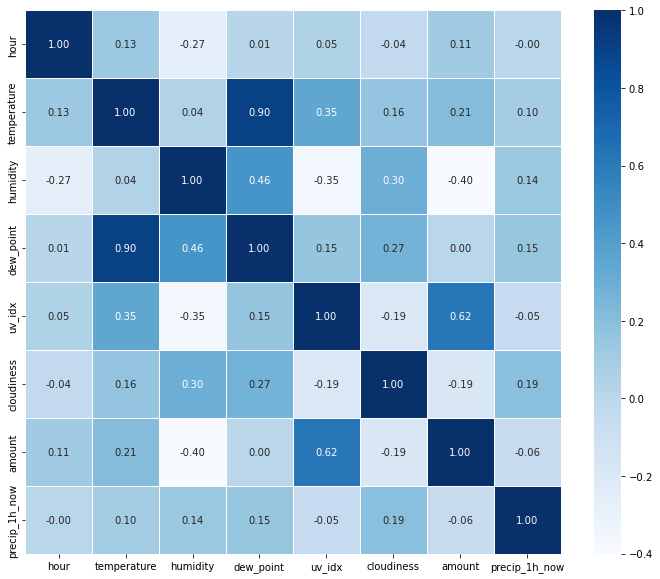

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data = total_df_no_na_tmp.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

# temperature와 dew point의 상관관계 엄청 크다.
# humidity와 dew_point의 상관관계가 있다.
# uv_idx와 amount의 상관관계가 크다.

## 일사량 uv_idx 와 온도 temperature 통합

In [ ]:
total_df_no_na_tmp = (total_df_no_na_tmp.assign( SS = lambda df: total_df_no_na_tmp['uv_idx'] + total_df_no_na_tmp['temperature'] ))

In [ ]:
total_df_no_na_tmp

,hour,temperature,humidity,dew_point,uv_idx,cloudiness,amount,precip_1h_now,SS
0,1,16.8,87.0,14.6,0.0,30.0,0.000,0.0,16.8
1,2,16.4,95.0,15.6,0.0,8.0,0.000,0.0,16.4
2,3,16.3,91.0,14.8,0.0,16.0,0.000,0.0,16.3
3,4,15.7,89.0,13.9,0.0,76.0,0.000,0.0,15.7
4,5,16.2,90.0,14.6,0.0,47.0,0.000,0.0,16.2
...,...,...,...,...,...,...,...,...,...
384202,19,13.3,69.0,7.8,0.0,2.0,0.004,0.0,13.3
384203,20,12.9,67.0,6.9,0.0,0.0,0.008,0.0,12.9
384204,21,12.7,44.0,0.7,0.0,0.0,0.008,0.0,12.7
384205,22,12.9,43.0,0.7,0.0,0.0,0.008,0.0,12.9


<AxesSubplot:xlabel='SS', ylabel='amount'>

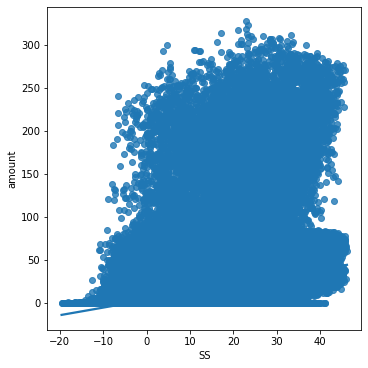

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="SS", y="amount", data=total_df_no_na_tmp, ax=ax)

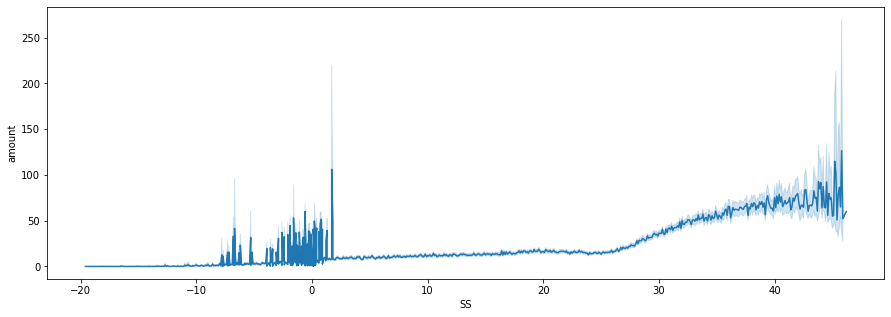

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['SS'], y=total_df_no_na['amount'])
plt.show()

# 합치면 안될 거 같다...

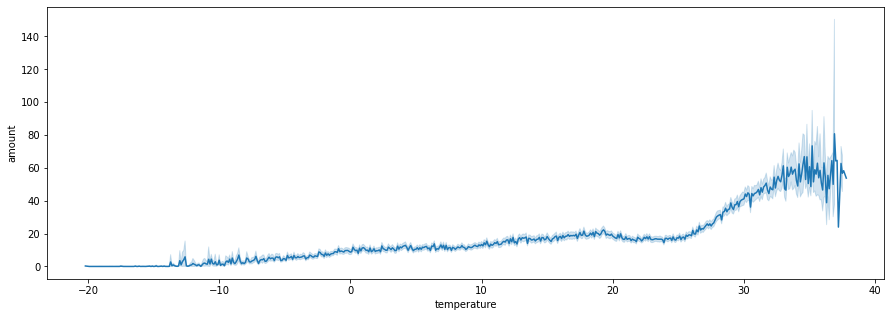

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['temperature'], y=total_df_no_na['amount'])
plt.show()

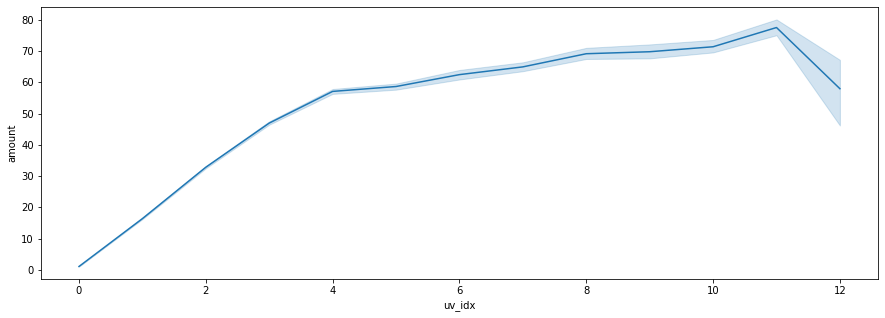

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['uv_idx'], y=total_df_no_na['amount'])
plt.show()

## 습도 humidity 와 이슬점 dew_point 합치자.

In [ ]:
# 습도 humidity와 이슬점 dew_point합쳐
total_df_no_na_tmp = (total_df_no_na_tmp.assign( SSS = lambda df: total_df_no_na_tmp['uv_idx'] + total_df_no_na_tmp['temperature'] ))

In [ ]:
total_df_no_na_tmp

,hour,temperature,humidity,dew_point,uv_idx,cloudiness,amount,precip_1h_now,SS,SSS
0,1,16.8,87.0,14.6,0.0,30.0,0.000,0.0,16.8,16.8
1,2,16.4,95.0,15.6,0.0,8.0,0.000,0.0,16.4,16.4
2,3,16.3,91.0,14.8,0.0,16.0,0.000,0.0,16.3,16.3
3,4,15.7,89.0,13.9,0.0,76.0,0.000,0.0,15.7,15.7
4,5,16.2,90.0,14.6,0.0,47.0,0.000,0.0,16.2,16.2
...,...,...,...,...,...,...,...,...,...,...
384202,19,13.3,69.0,7.8,0.0,2.0,0.004,0.0,13.3,13.3
384203,20,12.9,67.0,6.9,0.0,0.0,0.008,0.0,12.9,12.9
384204,21,12.7,44.0,0.7,0.0,0.0,0.008,0.0,12.7,12.7
384205,22,12.9,43.0,0.7,0.0,0.0,0.008,0.0,12.9,12.9


<AxesSubplot:xlabel='SSS', ylabel='amount'>

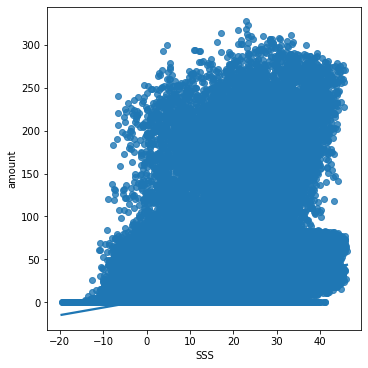

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="SSS", y="amount", data=total_df_no_na_tmp, ax=ax)

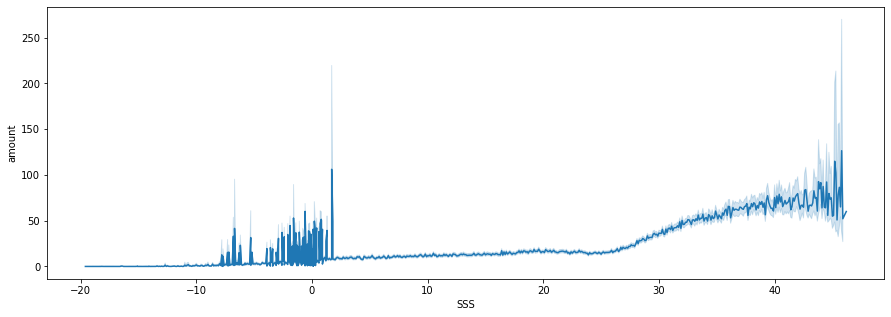

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['SSS'], y=total_df_no_na['amount'])
plt.show()

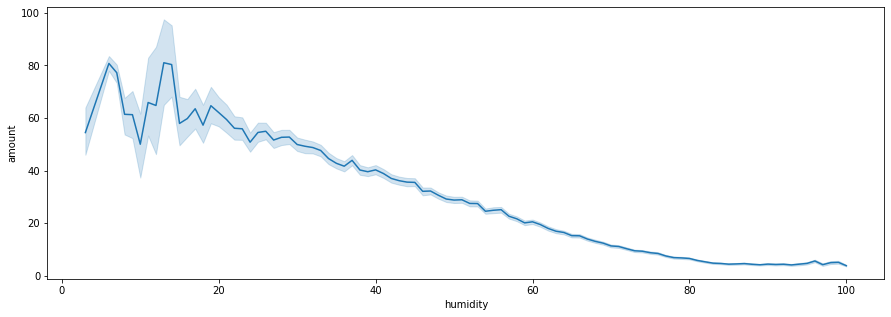

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['humidity'], y=total_df_no_na['amount'])
plt.show()

# 습도 20이상인 경우는 비례관계이지만 그 이전에는 습도가 별 영향을 주지 않는듯 보임.

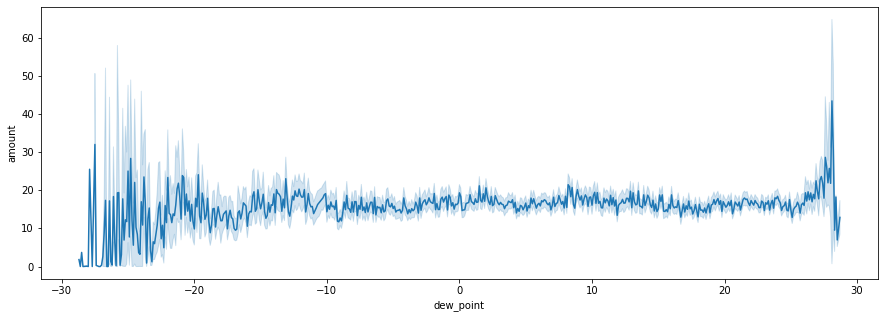

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['dew_point'], y=total_df_no_na['amount'])
plt.show()

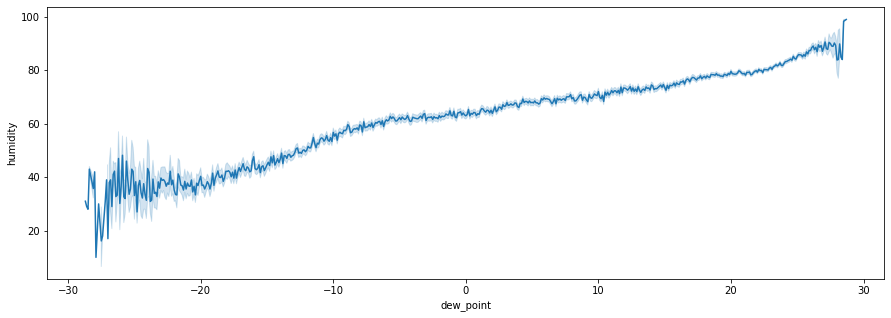

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['dew_point'], y=total_df_no_na['humidity'])
plt.show()

# 이슬점 필요없을듯

In [ ]:
total_df_no_na_tmp.drop(['dew_point'],axis=1,inplace=True)

In [ ]:
# SS, SSS 전부 사용안했으니까 삭제해주자
total_df_no_na_tmp.drop(['SSS','SS'],axis=1,inplace=True)

In [ ]:
total_df_no_na_tmp

,hour,temperature,humidity,uv_idx,cloudiness,amount,precip_1h_now
0,1,16.8,87.0,0.0,30.0,0.000,0.0
1,2,16.4,95.0,0.0,8.0,0.000,0.0
2,3,16.3,91.0,0.0,16.0,0.000,0.0
3,4,15.7,89.0,0.0,76.0,0.000,0.0
4,5,16.2,90.0,0.0,47.0,0.000,0.0
...,...,...,...,...,...,...,...
384202,19,13.3,69.0,0.0,2.0,0.004,0.0
384203,20,12.9,67.0,0.0,0.0,0.008,0.0
384204,21,12.7,44.0,0.0,0.0,0.008,0.0
384205,22,12.9,43.0,0.0,0.0,0.008,0.0


## 습도와 운량의 관계

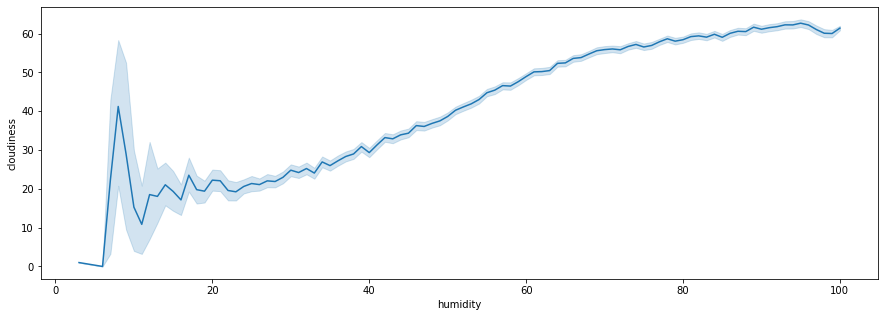

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['humidity'], y=total_df_no_na['cloudiness'])
plt.show()

# 습도 20이상일때는 유의미하다.

In [ ]:
# 습도 humidity와 운량 cloudiness 합쳐
total_df_no_na_tmp = (total_df_no_na_tmp.assign( SSSS = lambda df: total_df_no_na_tmp['humidity'] + total_df_no_na_tmp['cloudiness'] ))

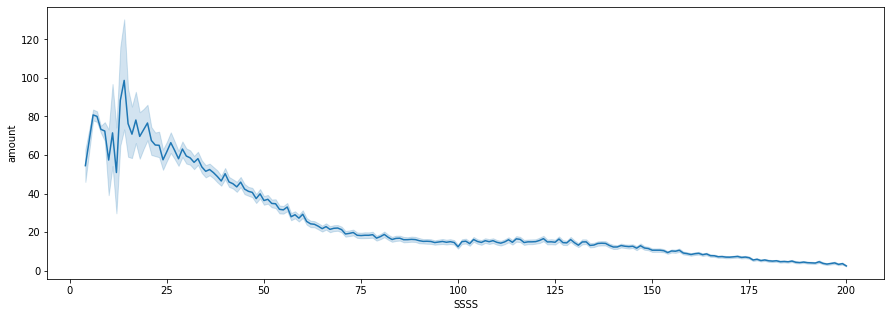

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['SSSS'], y=total_df_no_na['amount'])
plt.show()

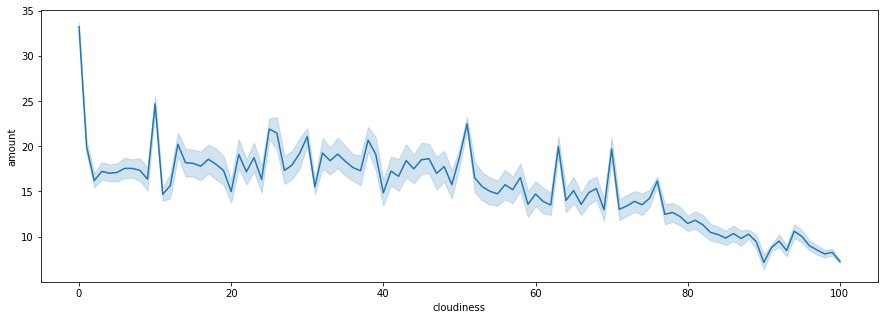

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['cloudiness'], y=total_df_no_na['amount'])
plt.show()

In [ ]:
total_df_no_na_tmp.drop(['cloudiness','humidity'],axis=1,inplace=True)

In [ ]:
total_df_no_na_tmp

,hour,temperature,uv_idx,amount,precip_1h_now,SSSS
0,1,16.8,0.0,0.000,0.0,117.0
1,2,16.4,0.0,0.000,0.0,103.0
2,3,16.3,0.0,0.000,0.0,107.0
3,4,15.7,0.0,0.000,0.0,165.0
4,5,16.2,0.0,0.000,0.0,137.0
...,...,...,...,...,...,...
384202,19,13.3,0.0,0.004,0.0,71.0
384203,20,12.9,0.0,0.008,0.0,67.0
384204,21,12.7,0.0,0.008,0.0,44.0
384205,22,12.9,0.0,0.008,0.0,43.0


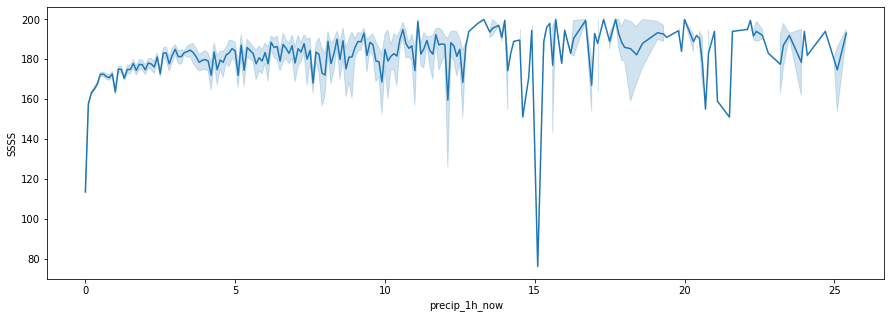

In [ ]:
#강수량과 SSSS의 관계는?
plt.figure(figsize=(15,5))
sns.lineplot(x = total_df_no_na_tmp['precip_1h_now'], y=total_df_no_na_tmp['SSSS'])
plt.show()

# 큰 의미 없을듯

In [ ]:
#train_test_split
sun_df = total_df_no_na_tmp.drop(['amount'], axis = 1)
target = total_df_no_na['amount']
X_train, X_test, y_train, y_test = train_test_split(sun_df, target, test_size = 0.2, random_state = 41)

In [ ]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

scalerY = StandardScaler()
scalerY.fit(y_train.reshape(-1,1))
y_train_scaled = scalerY.transform(y_train.reshape(-1,1))
y_test_scaled = scalerY.transform(y_test.reshape(-1,1))

In [ ]:
# 모델 훈련
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor
#model_tree = RandomForestRegressor(random_state=0, n_jobs=-1)
#parameters = {'n_estimators' : [200],
#              'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,24,25],
#              'max_samples' : [0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1.0], 
#              'max_features':[None, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
#grid_tree = GridSearchCV(model_tree, param_grid=parameters, cv=3, n_jobs=-1)
#grid_tree.fit(X_train, y_train)
#print(grid_tree.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train_scaled,y_train_scaled)

y_train_hat_scaled = clf.predict(X_train_scaled)
y_train_hat = scalerY.inverse_transform(y_train_hat_scaled.reshape(-1,1))
print(r2_score(y_train, y_train_hat))

y_test_hat_scaled = clf.predict(X_test_scaled)
y_test_hat = scalerY.inverse_transform(y_test_hat_scaled.reshape(-1,1))
print(r2_score(y_test, y_test_hat))

# 성능이 좋지 않음

0.9124057557392898
0.4563182485483471


In [ ]:
sun_df

,hour,temperature,uv_idx,precip_1h_now,SSSS
0,1,16.8,0.0,0.0,117.0
1,2,16.4,0.0,0.0,103.0
2,3,16.3,0.0,0.0,107.0
3,4,15.7,0.0,0.0,165.0
4,5,16.2,0.0,0.0,137.0
...,...,...,...,...,...
384202,19,13.3,0.0,0.0,71.0
384203,20,12.9,0.0,0.0,67.0
384204,21,12.7,0.0,0.0,44.0
384205,22,12.9,0.0,0.0,43.0


In [ ]:
features = ['hour','temperature','uv_idx','precip_1h_now','SSSS']
clf.feature_importances_

array([0.11598165, 0.24475367, 0.44093451, 0.00991379, 0.18841637])

In [ ]:
clf.feature_importances_.sum()

1.0

<AxesSubplot:>

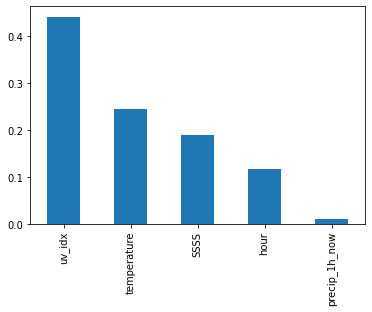

In [ ]:
tmp = pd.Series(clf.feature_importances_,
                    index=features)\
        .sort_values(ascending=False)
        
tmp.plot.bar()